For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [58]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [59]:
x = np.random.uniform(0, 20, 20)
x

array([ 1.25747497,  1.59770467,  2.98102918,  1.37236171, 11.52074837,
        0.45705831,  5.44751609, 16.37621953,  3.68241894,  2.50497911,
       15.0736583 ,  6.75112738,  6.08605181, 14.4636653 , 16.1486218 ,
        4.99082443,  9.13784205,  2.79593775,  9.20365329, 19.2891251 ])

In [60]:
y = -2*x+1
y

array([ -1.51494994,  -2.19540934,  -4.96205837,  -1.74472341,
       -22.04149675,   0.08588339,  -9.89503218, -31.75243906,
        -6.36483788,  -4.00995822, -29.14731659, -12.50225477,
       -11.17210362, -27.9273306 , -31.29724359,  -8.98164886,
       -17.2756841 ,  -4.5918755 , -17.40730658, -37.5782502 ])

#### Plot your data points. 

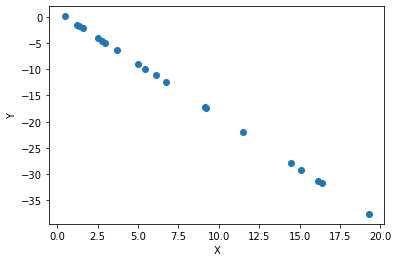

In [114]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### **Step_1:** Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [62]:
def batch_gd1(x,y,a=0.01,iteration = 1000):
    alpha = a
    t0 = 0
    t1 = 0 
    loss_f = []
    t0_list = []
    t1_list = []
    h_list = []
    for i in range(iteration):
        h = t0 + t1 *x
        h_list.append(h)
        cost_f = (sum((h-y)**2)/(2*len(x)))
        loss_f.append(cost_f)
        G0 = 1/len(x) * sum((h-y))
        G1 = sum((h-y)*x)/len(x)
        t0 = t0 - (alpha*G0)
        t0_list.append(t0)
        t1 = t1 - (alpha*G1)
        t1_list.append(t1)
        
    return h,t0,t1,t0_list,t1_list,loss_f,h_list

In [63]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = batch_gd1(x,y,a=0.01,iteration = 100)

In [64]:
def R2(y,h):
    ymean = np.mean(y)
    ssres = sum((y-h)**2)
    sstot = sum((y-ymean)**2)
    r2 = 1-(ssres/sstot)
    return r2
R2(y,h)

0.9982250383564244

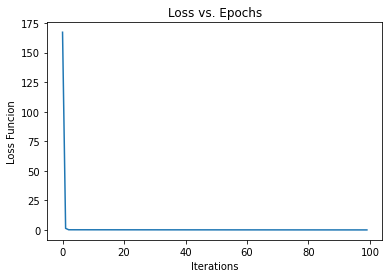

In [65]:
plt.plot(loss_f)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

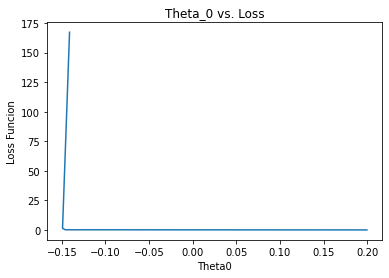

In [66]:
plt.plot(t0_list,loss_f)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

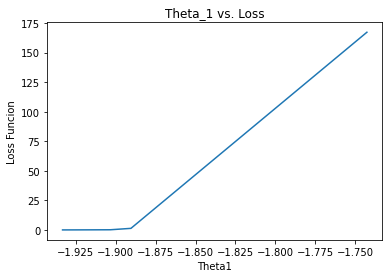

In [67]:
plt.plot(t1_list,loss_f)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

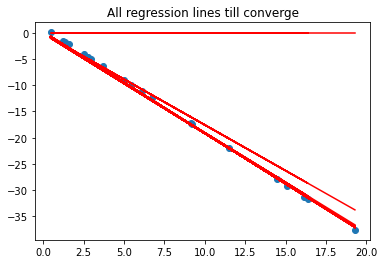

In [68]:
plt.scatter(x,y,label='Orignal data')
for i in range(0,len(h_list)):
    plt.plot(x,h_list[i],color='red',label='Model')
plt.title("All regression lines till converge")
plt.show()

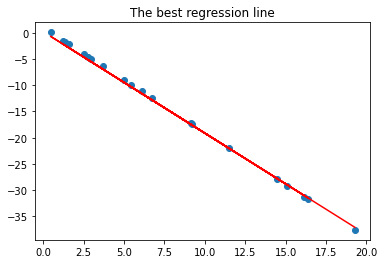

In [69]:
plt.scatter(x,y,label='Orignal data')
plt.plot(x,h,color='red',label='Model')
plt.title("The best regression line")
plt.show()

### **Step_2:** Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

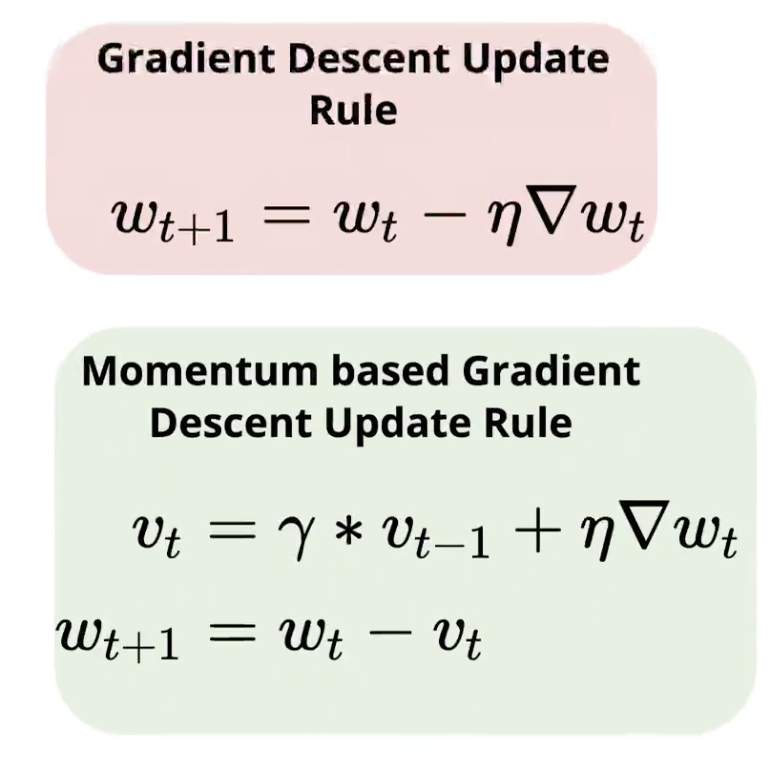

In [70]:
def Momentum_batch_gd(x,y,a=0.01,g=0.9,iteration = 1000):
    alpha = a
    gamma = g
    t0 = 0
    t1 = 0 
    mo_0=0
    mo_1=0
    loss_f = []
    t0_list = []
    t1_list = []
    h_list = []
    for i in range(iteration):
        h = t0 + t1 *x
        h_list.append(h)
        cost_f = (sum((h-y)**2)/(2*len(x)))
        loss_f.append(cost_f)
        G0 = 1/len(x) * sum((h-y))
        mo_0=(gamma*mo_0)+(alpha*G0)
        t0 = t0 - mo_0
        t0_list.append(t0)
        G1 = sum((h-y)*x)/len(x)
        mo_1=(gamma*mo_1)+(alpha*G1)
        t1 = t1 - mo_1
        t1_list.append(t1)
        
    return h,t0,t1,t0_list,t1_list,loss_f,h_list

# When Gamma = 0.9

In [71]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = Momentum_batch_gd(x,y,g=0.9,a=0.01,iteration = 50)

In [72]:
R2(y,h)

0.9854205516101663

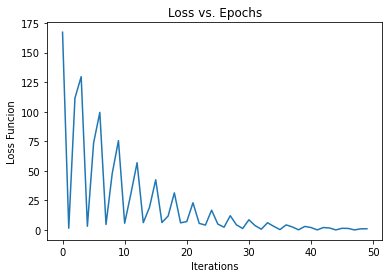

In [73]:
plt.plot(loss_f)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

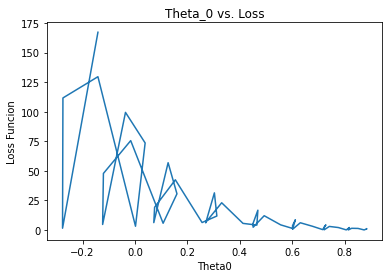

In [74]:
plt.plot(t0_list,loss_f)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

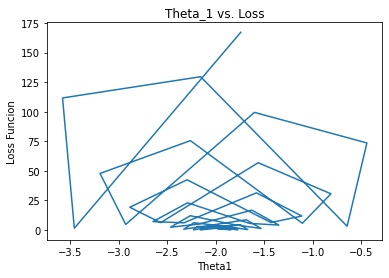

In [75]:
plt.plot(t1_list,loss_f)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

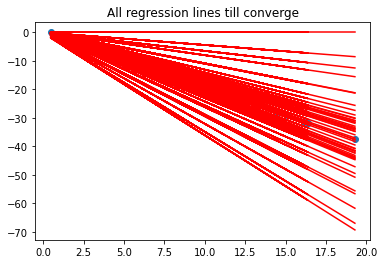

In [76]:
plt.scatter(x,y,label='Orignal data')
for i in range(0,len(h_list)):
    plt.plot(x,h_list[i],color='red',label='Model')
plt.title("All regression lines till converge")
plt.show()

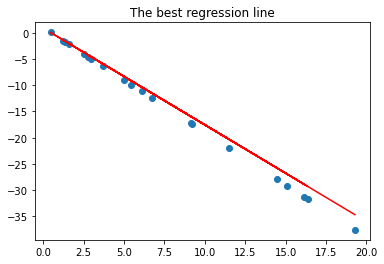

In [77]:
plt.scatter(x,y,label='Orignal data')
plt.plot(x,h,color='red',label='Model')
plt.title("The best regression line")
plt.show()

#### **Step_3:** Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

# When Gamma = 0

In [78]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = Momentum_batch_gd(x,y,a=0.01,g=0,iteration = 50)

In [79]:
R2(y,h)

0.9974303181476859

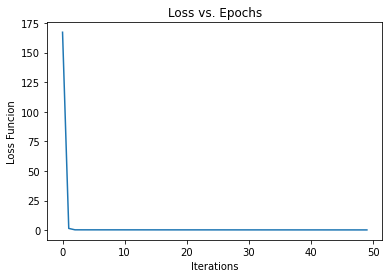

In [80]:
plt.plot(loss_f)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

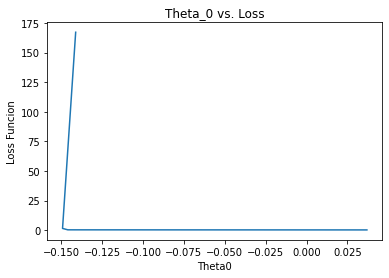

In [81]:
plt.plot(t0_list,loss_f)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

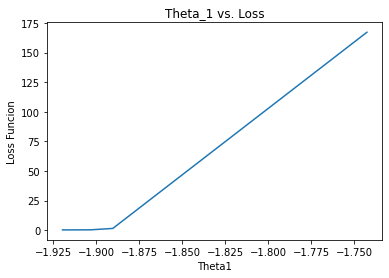

In [82]:
plt.plot(t1_list,loss_f)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

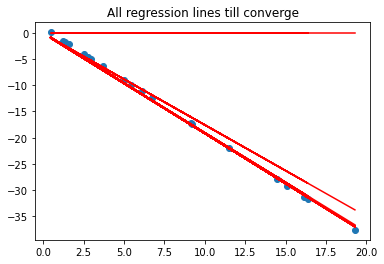

In [83]:
plt.scatter(x,y,label='Orignal data')
for i in range(0,len(h_list)):
    plt.plot(x,h_list[i],color='red',label='Model')
plt.title("All regression lines till converge")
plt.show()

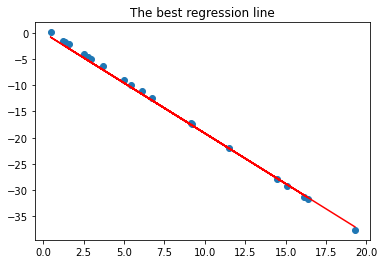

In [84]:
plt.scatter(x,y,label='Orignal data')
plt.plot(x,h,color='red',label='Model')
plt.title("The best regression line")
plt.show()

# When Gamma = 0.5

In [85]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = Momentum_batch_gd(x,y,a=0.01,g=0.5,iteration = 50)

In [86]:
R2(y,h)

0.9981967264552326

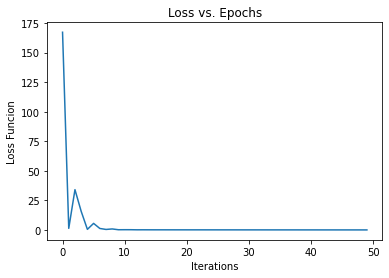

In [87]:
plt.plot(loss_f)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

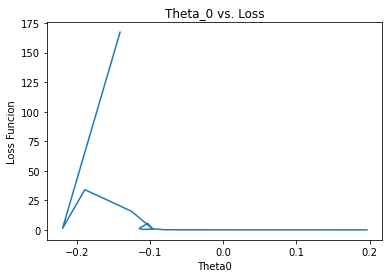

In [88]:
plt.plot(t0_list,loss_f)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

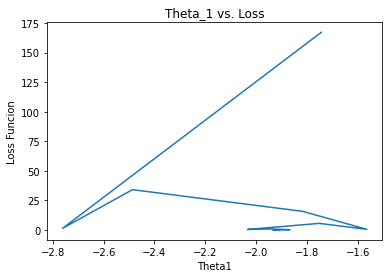

In [89]:
plt.plot(t1_list,loss_f)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

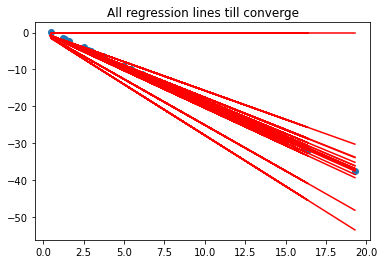

In [90]:
plt.scatter(x,y,label='Orignal data')
for i in range(0,len(h_list)):
    plt.plot(x,h_list[i],color='red',label='Model')
plt.title("All regression lines till converge")
plt.show()

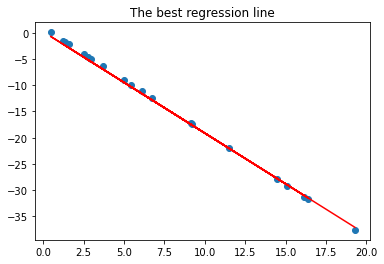

In [91]:
plt.scatter(x,y,label='Orignal data')
plt.plot(x,h,color='red',label='Model')
plt.title("The best regression line")
plt.show()

### **Step_4: **Update your Batch GD for one variable  implementation to be NAG and check your results

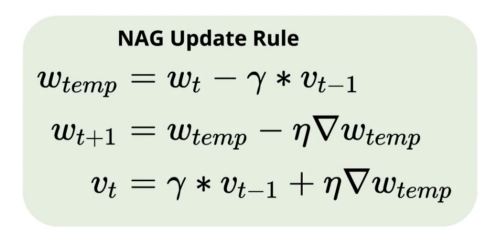

In [92]:
def Nag_batch_gd(x,y,a=0.01,g=0.9,iteration = 1000):
    alpha = a
    gamma = g
    t0 = 0
    t1 = 0 
    mo_0=0
    mo_1=0
    loss_f = []
    t0_list = []
    t1_list = []
    h_list = []
    for i in range(iteration):
        h = t0 + t1 *x
        h_list.append(h)
        cost_f = (sum((h-y)**2)/(2*len(x)))
        loss_f.append(cost_f)
        temp0 = t0 - gamma*mo_0
        G0 = 1/len(x) * sum((h-y))
        t0 = temp0 - (alpha*G0)
        mo_0=(gamma*mo_0)+(alpha*G0)
        t0_list.append(t0)
        
        temp1 = t1 - gamma*mo_1
        G1 = sum((h-y)*x)/len(x)
        t1 = temp1 - (alpha*G1)
        mo_1=(gamma*mo_1)+(alpha*G1)
        t1_list.append(t1)
        
    return h,t0,t1,t0_list,t1_list,loss_f,h_list

# When Gamma = 0.9

In [93]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = Nag_batch_gd(x,y,a=0.01,iteration = 50)

In [94]:
R2(y,h)

0.9854205516101664

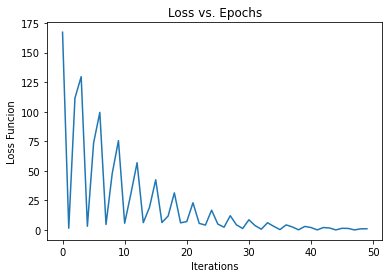

In [95]:
plt.plot(loss_f)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

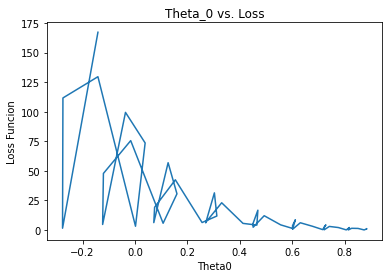

In [96]:
plt.plot(t0_list,loss_f)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

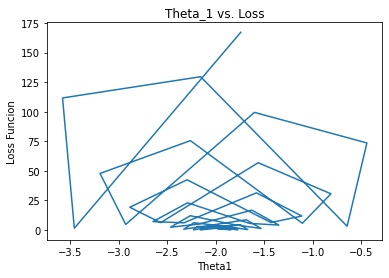

In [97]:
plt.plot(t1_list,loss_f)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

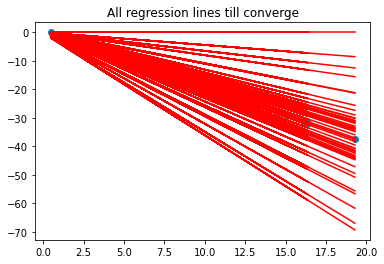

In [98]:
plt.scatter(x,y,label='Orignal data')
for i in range(0,len(h_list)):
    plt.plot(x,h_list[i],color='red',label='Model')
plt.title("All regression lines till converge")
plt.show()

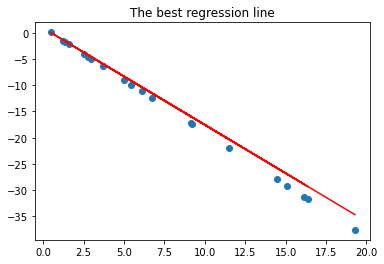

In [99]:
plt.scatter(x,y,label='Orignal data')
plt.plot(x,h,color='red',label='Model')
plt.title("The best regression line")
plt.show()

# When Gamma = 0.5

In [100]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = Nag_batch_gd(x,y,g=0.5,a=0.01,iteration = 50)

In [101]:
R2(y,h)

0.9981967264552326

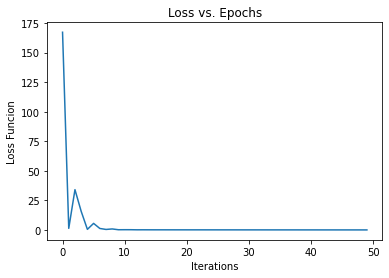

In [102]:
plt.plot(loss_f)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

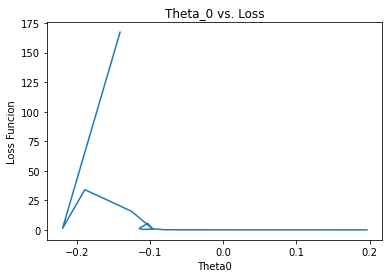

In [103]:
plt.plot(t0_list,loss_f)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

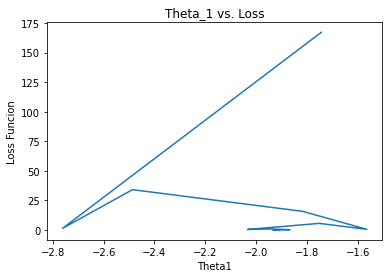

In [104]:
plt.plot(t1_list,loss_f)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

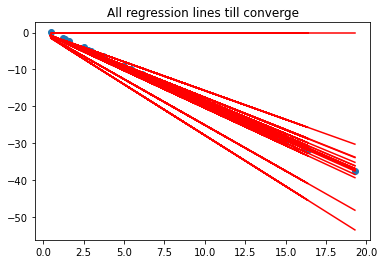

In [105]:
plt.scatter(x,y,label='Orignal data')
for i in range(0,len(h_list)):
    plt.plot(x,h_list[i],color='red',label='Model')
plt.title("All regression lines till converge")
plt.show()

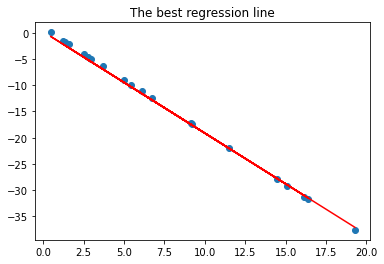

In [106]:
plt.scatter(x,y,label='Orignal data')
plt.plot(x,h,color='red',label='Model')
plt.title("The best regression line")
plt.show()

# When Gamma = 0

In [107]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = Nag_batch_gd(x,y,g=0,a=0.01,iteration = 50)

In [108]:
R2(y,h)

0.9974303181476859

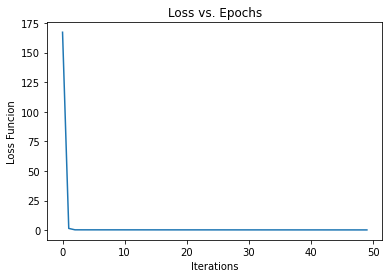

In [109]:
plt.plot(loss_f)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

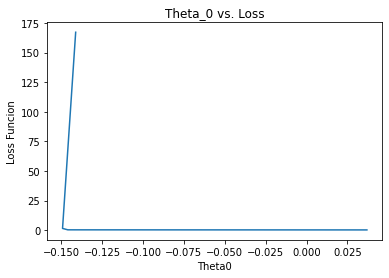

In [110]:
plt.plot(t0_list,loss_f)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

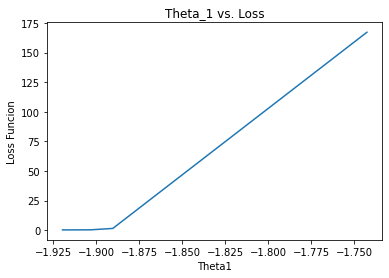

In [111]:
plt.plot(t1_list,loss_f)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

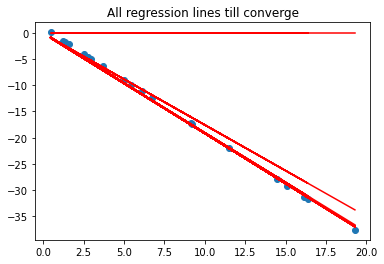

In [112]:
plt.scatter(x,y,label='Orignal data')
for i in range(0,len(h_list)):
    plt.plot(x,h_list[i],color='red',label='Model')
plt.title("All regression lines till converge")
plt.show()

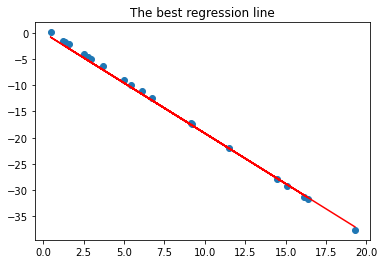

In [113]:
plt.scatter(x,y,label='Orignal data')
plt.plot(x,h,color='red',label='Model')
plt.title("The best regression line")
plt.show()